### 1. Importing Libraries

In [1]:
#Authors: Anirudh Madhusudan & Siddharth Chakravarthy 
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from scipy.stats import norm

### 2. Defining CRR Binomial Model Function

In [2]:

def CRRBionomial(Option, K, T, S0, sigma, r, q, N, Exercise):
    
    start = time.clock()
    
    #Calculated Parameters
    delta=T/N
    s = np.zeros((N+1,2))
    u=np.e**(sigma*np.sqrt(delta))
    d=np.e**(-sigma*np.sqrt(delta))
    p=(np.e**((r-q)*delta)-d)/(u-d)
 
    if (Option=='P'):
        if (Exercise=='A'):
       
                for i in range(N+1):
                    s[i][0] = S0*(u**(N-i))*(d**i)
                    s[i][1] = max(K-s[i][0],0)
                    
                for i in range(N):
                    for j in range(N-i):
                        s[j][0] = S0*(u**(N-1-i-j))*(d**(j))
                        s[j][1] = max(K - max(s[j][0], 0), (np.e**(-r * delta))*(p*s[j][1] + (1 - p)*s[j + 1][1]))
                    
                    
               
        if Exercise== 'E':
            
                #Finding the stock price at node (i,j)
                for i in range(N+1):
                    s[i][0] = S0*u**(N-i)*d**i
                    s[i][1] = max(K-s[i][0],0)
                    
                
                #Backward Induction
                for i in range(N):
                    for j in range(N-i):
                        z2 = (1-p)*s[j+1][1]
                        x = np.e**(-r*delta)
                        z1 = p*s[j][1]
                        s[j][1] = x*(z1+z2)
                        
    #CALL OPTION
    if Option == 'C':
        
        #American Option
        if Exercise== 'A':
               
                #Finding the stock price at node (i,j)
                for i in range(N+1):
                    s[i][0] = S0*u**(N-i)*(d**i)
                    s[i][1] = max(s[i][0]-K,0)
                    
                    
                for i in range(N):
                    for j in range(N-i):
                        s[j][0] = S0*(u**(N-1-i-j))*(d**(j))
                        s[j][1] = max(max(s[j][0] - K, 0), (np.e**(-r * delta))*(p*s[j][1] + (1 - p)*s[j + 1][1]))
    
                
        #European Option    
        if Exercise== 'E':
             
                #Finding the stock price at node (i,j)
                for i in range(N+1):
                    s[i][0] = S0*u**(N-i)*(d**i)
                    s[i][1] = max(s[i][0]-K,0)
                    
                
                #Backward Induction
                for i in range(N):
                    for j in range(N-i):
                        z2 = (1-p)*s[j+1][1]
                        x = np.e**(-r*delta)
                        z1 = p*s[j][1]
                        s[j][1] = x*(z1+z2)
    
    price = s[0][1]
    timetaken = time.clock() - start
    
    return (price,timetaken)

### 3. Defining Black-Scholes Function

In [3]:
def BlackScholesFormula (option, K, T, S0, sigma, r, q):
    
    d1 = (np.log(S0/K)+(r-q+0.5*sigma**2)*T)/(sigma*T**0.5)
    d2 = d1 - sigma*T**0.5
    
    if option == 'C':
        price = (S0*np.e**(-q*T)*norm.cdf(d1)) - K*np.e**(-r*T)*norm.cdf(d2)
        
    if option == 'P':
        price = -(S0*np.e**(-q*T)*norm.cdf(-d1)) + K*np.e**(-r*T)*norm.cdf(-d2)
        
    return price

### 4. Computing European Call Option Price using Black-Scholes Formula
1-year  European  call  option, K =  100  , S0 = 100, r = 0.05, q = 0.04, σ = 0.02


In [4]:
BSprice = BlackScholesFormula("C",100,1,100,0.2,0.05,0.04)
print (BSprice)

8.10264353446


### 5. Computing European Call Option Price Using CRR Binomial Model for n = [1,2500]
1-year  European  call  option, K =  100  , S0 = 100, r = 0.05, q = 0.04, σ = 0.02


In [ ]:
CRRPriceList = []

for i in range(1,2500):
    CRRPrice,T = CRRBionomial("C", 100, 1, 100, 0.2, 0.05, 0.04, i, "E") 
    CRRPriceList.append(CRRPrice)
    

### 6. Plotting the Convergence of CRR Model to the Black Scholes Model with increasing N

There are two graphs below, the first shows the convergence from N = 1 to 200, the second shows the same covergence from N = 1 to 2500. 

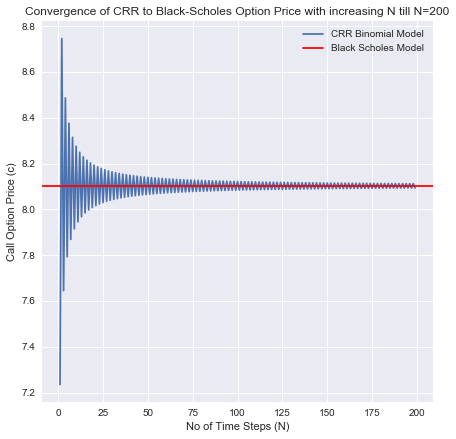

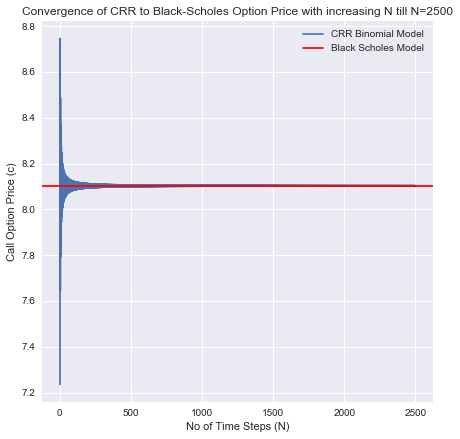

In [52]:
sns.set()
plt.figure(figsize=(7,7))
plt.plot(range(1,200),CRRPriceList[1:200], mfc='b',label="CRR Binomial Model")
plt.axhline(y=BSprice,c='r',label="Black Scholes Model")
plt.legend(loc="best")
plt.ylabel("Call Option Price (c)")
plt.xlabel("No of Time Steps (N)")
plt.title("Convergence of CRR to Black-Scholes Option Price with increasing N till N=200")
plt.show()


sns.set()
plt.figure(figsize=(7,7))
plt.plot(range(1,2499),CRRPriceList[1:2500], mfc='b',label="CRR Binomial Model")
plt.axhline(y=BSprice,c='r',label="Black Scholes Model")
plt.legend(loc="best")
plt.ylabel("Call Option Price (c)")
plt.xlabel("No of Time Steps (N)")
plt.title("Convergence of CRR to Black-Scholes Option Price with increasing N till N=2500")
plt.show()

### 7. No. of Steps to Achieve 10^-3 Put Option Price Accuracy for CRR Bionomial Model | q = 0 

In [54]:
steps = [100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000]
for month in range(1,13):
    OptPrice = []
    for i in steps:
        CRRPrice,T = CRRBionomial("P", 100, month/12, 100, 0.2, 0.05, 0, i, "A")
        OptPrice.append(CRRPrice)
    
    OptPriceRev = OptPrice[::-1]
    stepRev = steps[::-1]
    for i in range(len(steps)+1):
        if (abs(OptPriceRev[0]-OptPriceRev[i]) > 0.001):
            t = stepRev[i-1]
            CRRPrice,T = CRRBionomial("P", 100, month/12, 100, 0.2, 0.05, 0, t, "A")
            print ("The N value for ", month, "months is", (stepRev[i-1]),". The corresponding Option Price is: ",CRRPrice)
            break
 

The N value for  1 months is 400 . The corresponding Option Price is:  2.12598815614
The N value for  2 months is 500 . The corresponding Option Price is:  2.91137673581
The N value for  3 months is 500 . The corresponding Option Price is:  3.47882597695
The N value for  4 months is 600 . The corresponding Option Price is:  3.93472235402
The N value for  5 months is 600 . The corresponding Option Price is:  4.31963127987
The N value for  6 months is 600 . The corresponding Option Price is:  4.65463550117
The N value for  7 months is 600 . The corresponding Option Price is:  4.95212836792
The N value for  8 months is 700 . The corresponding Option Price is:  5.22032186379
The N value for  9 months is 700 . The corresponding Option Price is:  5.46446125712
The N value for  10 months is 700 . The corresponding Option Price is:  5.68875026141
The N value for  11 months is 700 . The corresponding Option Price is:  5.89623285094
The N value for  12 months is 700 . The corresponding Option Pr

### 8. No. of Steps to Achieve 10^-3 Put Option Price Accuracy for CRR Bionomial Model | q = 0.04

In [59]:
steps = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,3000,5000]
Nvalues = []
for month in range(1,13):
    OptPrice = []
    for i in steps:
        CRRPrice,T = CRRBionomial("P", 100, month/12, 100, 0.2, 0.05, 0.04, i, "A")
        OptPrice.append(CRRPrice)
    
    OptPriceRev = OptPrice[::-1]
    stepRev = steps[::-1]
    for i in range(len(steps)+1):
        if (abs(OptPriceRev[0]-OptPriceRev[i]) > 0.001):
            t = stepRev[i-1]
            CRRPrice,T = CRRBionomial("P", 100, month/12, 100, 0.2, 0.05, 0.04, t, "A")
            print ("The N value for ", month, "months is", (stepRev[i-1]),". The corresponding Option Price is: ",CRRPrice)
            break

The N value for  1 months is 500 . The corresponding Option Price is:  2.25796069176
The N value for  2 months is 600 . The corresponding Option Price is:  3.16313414343
The N value for  3 months is 700 . The corresponding Option Price is:  3.84372216904
The N value for  4 months is 800 . The corresponding Option Price is:  4.40736410204
The N value for  5 months is 900 . The corresponding Option Price is:  4.89587969173
The N value for  6 months is 900 . The corresponding Option Price is:  5.33066868044
The N value for  7 months is 900 . The corresponding Option Price is:  5.72466807619
The N value for  8 months is 1000 . The corresponding Option Price is:  6.08637500923
The N value for  9 months is 1000 . The corresponding Option Price is:  6.42137637229
The N value for  10 months is 1000 . The corresponding Option Price is:  6.73404780388
The N value for  11 months is 1000 . The corresponding Option Price is:  7.02761145908
The N value for  12 months is 1100 . The corresponding Opti

## 9. Plotting Option Price of 12 month Put Option as a Function of S0 for q = 0 and q = 0.04


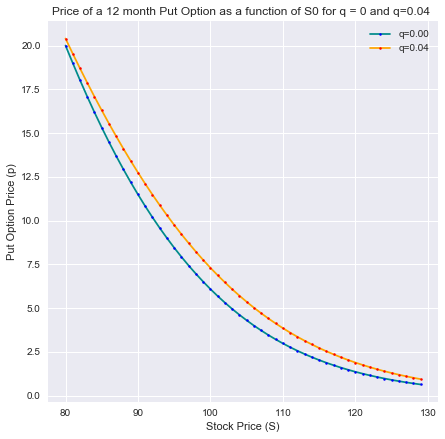

In [76]:
#q = 0.00 | Put Option 
OptPrice1 = []
for i in range(80,130):
    #CRRBionomial(Option, K, T, S0, sigma, r, q, N, Exercise)
    CRRPrice,T = CRRBionomial("P", 100, 1,i, 0.2, 0.05, 0, 3000, "A")
    OptPrice1.append(CRRPrice) 

#q = 0.04 | Put Option 
OptPrice2 = []
for i in range(80,130):
    #CRRBionomial(Option, K, T, S0, sigma, r, q, N, Exercise)
    CRRPrice,T = CRRBionomial("P", 100, 1,i, 0.2, 0.05, 0.04, 3000, "A")
    OptPrice2.append(CRRPrice)

sns.set()
plt.figure(figsize=(7,7))
plt.plot(range(80,130),OptPrice1, marker='o',c='darkcyan',ms=2.5, mfc='b',label="q=0.00")
plt.plot(range(80,130),OptPrice2, marker='o',c='orange',ms=2.5, mfc='r',label="q=0.04")
plt.legend(loc="best")
plt.ylabel("Put Option Price (p)")
plt.xlabel("Stock Price (S)")
plt.title("Price of a 12 month Put Option as a function of S0 for q = 0 and q=0.04 ")
plt.show()

## 10. Estimating the Critical Stock Price for Put Option at q = 0.00

In [69]:
K = 100
S_starter = []
for t in range(1,13):
        for s in range(60,100):
            a, T = CRRBionomial("P", 100, t/12, s , 0.2, 0.05, 0, 3000, "A") 
            b = K-s
            if (abs(b-a)>0.005):
                S_starter.append(s-1)
                break  
CritPrice1 = []
for t in range(0,12):
        for i in range(1,100):
            S0 = S_starter[t] + i*0.01
            a, T = CRRBionomial("P", 100, (t+1)/12, S0 , 0.2, 0.05, 0, 3000, "A") 
            b = K-S0
            if (abs(b-a)>0.005):
                print ("The Critical Stock Price for q=0 for month: ", t+1,"is :", S_star)
                CritPrice1.append(S_star)
                break
            if (abs(b-a)<0.005):
                S_star = S0

The Critical Stock Price for q=0 for month:  1 is : 91.3
The Critical Stock Price for q=0 for month:  2 is : 88.91
The Critical Stock Price for q=0 for month:  3 is : 87.34
The Critical Stock Price for q=0 for month:  4 is : 86.17
The Critical Stock Price for q=0 for month:  5 is : 85.23
The Critical Stock Price for q=0 for month:  6 is : 84.44
The Critical Stock Price for q=0 for month:  7 is : 83.77
The Critical Stock Price for q=0 for month:  8 is : 83.18
The Critical Stock Price for q=0 for month:  9 is : 82.66
The Critical Stock Price for q=0 for month:  10 is : 82.2
The Critical Stock Price for q=0 for month:  11 is : 81.77
The Critical Stock Price for q=0 for month:  12 is : 81.38


## 11. Estimating the Critical Stock Price for Put Option at q = 0.04

In [71]:
K = 100
S_starter1 = []
for t in range(1,13):
        for s in range(60,100):
            a, T = CRRBionomial("P", 100, t/12, s , 0.2, 0.05, 0.04, 3000, "A") 
            b = K-s
            if (abs(b-a)>0.005):
                S_starter1.append(s-1)
                break  
CritPrice2 = []
for t in range(0,12):
        for i in range(1,100):
            S0 = S_starter1[t] + i*0.01
            a, T = CRRBionomial("P", 100, (t+1)/12, S0 , 0.2, 0.05, 0.04, 3000, "A") 
            b = K-S0
            if (abs(b-a)>0.005):
                print ("The Critical Stock Price for q=0.04 for month: ", t+1,"is :", S_star)
                CritPrice2.append(S_star)
                break
            if (abs(b-a)<0.005):
                S_star = S0

The Critical Stock Price for q=0.04 for month:  1 is : 88.87
The Critical Stock Price for q=0.04 for month:  2 is : 85.47
The Critical Stock Price for q=0.04 for month:  3 is : 83.21
The Critical Stock Price for q=0.04 for month:  4 is : 81.49
The Critical Stock Price for q=0.04 for month:  5 is : 80.1
The Critical Stock Price for q=0.04 for month:  6 is : 78.93
The Critical Stock Price for q=0.04 for month:  7 is : 77.92
The Critical Stock Price for q=0.04 for month:  8 is : 77.04
The Critical Stock Price for q=0.04 for month:  9 is : 76.25
The Critical Stock Price for q=0.04 for month:  10 is : 75.54
The Critical Stock Price for q=0.04 for month:  11 is : 74.9
The Critical Stock Price for q=0.04 for month:  12 is : 74.31


## 12. Plotting the Critical Stock Prices for Put Option at q = 0 and q = 0.04 as a Function of Time

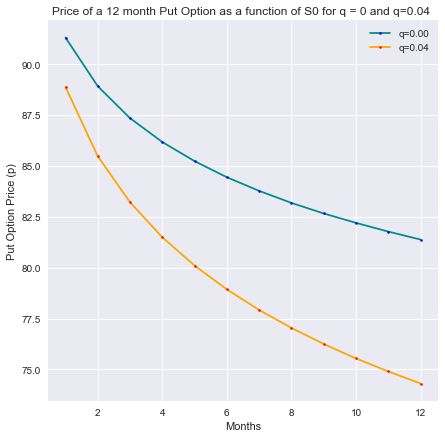

In [77]:
sns.set()
plt.figure(figsize=(7,7))
plt.plot(range(1,13),CritPrice1, marker='o',c='darkcyan',ms=2.5, mfc='b',label="q=0.00")
plt.plot(range(1,13),CritPrice2, marker='o',c='orange',ms=2.5, mfc='r',label="q=0.04")
plt.legend(loc="best")
plt.ylabel("Put Option Price (p)")
plt.xlabel("Months")
plt.title("Price of a 12 month Put Option as a function of S0 for q = 0 and q=0.04 ")
plt.show()

## 13. No. of Steps to Achieve 10^-3 Call Option Price Accuracy for CRR Model | q = 0.04 

In [85]:
steps = [500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,3000,5000]
for month in range(1,13):
    OptPrice = []
    for i in steps:
        CRRPrice,T = CRRBionomial("C", 100, month/12, 100, 0.2, 0.05, 0.04, i, "A")
        OptPrice.append(CRRPrice)
    
    OptPriceRev = OptPrice[::-1]
    stepRev = steps[::-1]
    for i in range(len(steps)+1):
        if (abs(OptPriceRev[0]-OptPriceRev[i]) > 0.001):
            t = stepRev[i-1]
            CRRPrice,T = CRRBionomial("C", 100, month/12, 100, 0.2, 0.05, 0.04, t, "A")
            print ("The N value for ", month, "months is", (stepRev[i-1]),". The corresponding Option Price is: ",CRRPrice)
            break
    

The N value for  1 months is 600 . The corresponding Option Price is:  2.33514846077
The N value for  2 months is 700 . The corresponding Option Price is:  3.31435124277
The N value for  3 months is 900 . The corresponding Option Price is:  4.06697130743
The N value for  4 months is 1000 . The corresponding Option Price is:  4.70075777352
The N value for  5 months is 1100 . The corresponding Option Price is:  5.25794534715
The N value for  6 months is 1100 . The corresponding Option Price is:  5.76012662503
The N value for  7 months is 1200 . The corresponding Option Price is:  6.22046630996
The N value for  8 months is 1300 . The corresponding Option Price is:  6.6473174013
The N value for  9 months is 1300 . The corresponding Option Price is:  7.04649168852
The N value for  10 months is 1400 . The corresponding Option Price is:  7.42249590082
The N value for  11 months is 1400 . The corresponding Option Price is:  7.77840992862
The N value for  12 months is 1400 . The corresponding O

## 14. No. of Steps to Achieve 10^-3 Call Option Price Accuracy for CRR Model | q = 0.08 

In [88]:
steps = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,3000,5000]
Nvalues = []
for month in range(1,13):
    OptPrice = []
    for i in steps:
        CRRPrice,T = CRRBionomial("C", 100, month/12, 100, 0.2, 0.05, 0.08, i, "A")
        OptPrice.append(CRRPrice)
    
    OptPriceRev = OptPrice[::-1]
    stepRev = steps[::-1]
    for i in range(len(steps)+1):
        if (abs(OptPriceRev[0]-OptPriceRev[i]) > 0.001):
            t = stepRev[i-1]
            CRRPrice,T = CRRBionomial("C", 100, month/12, 100, 0.2, 0.05, 0.08, t, "A")
            print ("The N value for ", month, "months is", (stepRev[i-1]),". The corresponding Option Price is: ",CRRPrice)
            break

The N value for  1 months is 400 . The corresponding Option Price is:  2.18601657724
The N value for  2 months is 500 . The corresponding Option Price is:  3.02210818504
The N value for  3 months is 600 . The corresponding Option Price is:  3.63529420481
The N value for  4 months is 600 . The corresponding Option Price is:  4.13277444432
The N value for  5 months is 700 . The corresponding Option Price is:  4.55657310147
The N value for  6 months is 700 . The corresponding Option Price is:  4.92776512311
The N value for  7 months is 700 . The corresponding Option Price is:  5.25924767627
The N value for  8 months is 700 . The corresponding Option Price is:  5.5593326373
The N value for  9 months is 800 . The corresponding Option Price is:  5.83394701699
The N value for  10 months is 800 . The corresponding Option Price is:  6.08701272419
The N value for  11 months is 800 . The corresponding Option Price is:  6.32185859612
The N value for  12 months is 800 . The corresponding Option Pri

## 15. Plotting Option Price of 1 yr Call Option as a Function of S0 for q = 0.04 & q = 0.08


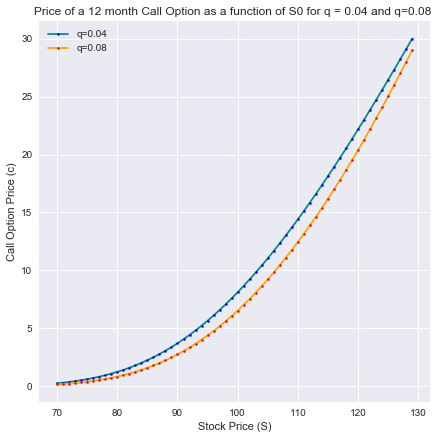

In [93]:
#q = 0.04 | Call Option 
OptPrice3 = []
for i in range(70,130):
    #CRRBionomial(Option, K, T, S0, sigma, r, q, N, Exercise)
    CRRPrice,T = CRRBionomial("C", 100, 1,i, 0.2, 0.05, 0.04, 3000, "A")
    OptPrice3.append(CRRPrice) 

#q = 0.08 | Call Option 
OptPrice4 = []
for i in range(70,130):
    #CRRBionomial(Option, K, T, S0, sigma, r, q, N, Exercise)
    CRRPrice,T = CRRBionomial("C", 100, 1,i, 0.2, 0.05, 0.08, 3000, "A")
    OptPrice4.append(CRRPrice)
    
sns.set()
plt.figure(figsize=(7,7))
plt.plot(range(70,130),OptPrice3, marker='o',c='darkcyan',ms=2.5, mfc='b',label="q=0.04")
plt.plot(range(70,130),OptPrice4, marker='o',c='orange',ms=2.5, mfc='r',label="q=0.08")
plt.legend(loc="best")
plt.ylabel("Call Option Price (c)")
plt.xlabel("Stock Price (S)")
plt.title("Price of a 12 month Call Option as a function of S0 for q = 0.04 and q=0.08 ")
plt.show()

## 16. Estimating the Critical Stock Price for Call Option at q = 0.04

In [90]:
K = 100
S_starter = []
for t in range(1,13):
        for s in range(170,100):
            a, T = CRRBionomial("C", 100, t/12, s , 0.2, 0.05, 0.04, 3000, "A") 
            b = -(K-s)
            if (abs(b-a)>0.005):
                S_starter.append(s+1)
                break  
CritPrice1 = []
for t in range(0,12):
        for i in range(1,100):
            S0 = S_starter[t] - i*0.01
            a, T = CRRBionomial("C", 100, (t+1)/12, S0 , 0.2, 0.05, 0.04, 3000, "A") 
            b = -(K-S0)
            if (abs(b-a)>0.005):
                print ("The Critical Stock Price for q=0.04 for month: ", t+1,"is :", S_star)
                CritPrice1.append(S_star)
                break
            if (abs(b-a)<0.005):
                S_star = S0

The Critical Stock Price for q=0.04 for month:  1 is : 125.09
The Critical Stock Price for q=0.04 for month:  2 is : 128.76
The Critical Stock Price for q=0.04 for month:  3 is : 132.29
The Critical Stock Price for q=0.04 for month:  4 is : 135.48
The Critical Stock Price for q=0.04 for month:  5 is : 138.29
The Critical Stock Price for q=0.04 for month:  6 is : 140.81
The Critical Stock Price for q=0.04 for month:  7 is : 143.09
The Critical Stock Price for q=0.04 for month:  8 is : 145.16
The Critical Stock Price for q=0.04 for month:  9 is : 147.07
The Critical Stock Price for q=0.04 for month:  10 is : 148.84
The Critical Stock Price for q=0.04 for month:  11 is : 150.50
The Critical Stock Price for q=0.04 for month:  12 is : 152.04


## 17. Estimating the Critical Stock Price for Call Option at q = 0.08

In [91]:
K = 100
S_starter = []
for t in range(1,13):
        for s in range(170,100):
            a, T = CRRBionomial("C", 100, t/12, s , 0.2, 0.05, 0.08, 3000, "A") 
            b = -(K-s)
            if (abs(b-a)>0.005):
                S_starter.append(s+1)
                break  
CritPrice2 = []
for t in range(0,12):
        for i in range(1,100):
            S0 = S_starter[t] - i*0.01
            a, T = CRRBionomial("C", 100, (t+1)/12, S0 , 0.2, 0.05, 0.08, 3000, "A") 
            b = -(K-S0)
            if (abs(b-a)>0.005):
                print ("The Critical Stock Price for q=0.08 for month: ", t+1,"is :", S_star)
                CritPrice2.append(S_star)
                break
            if (abs(b-a)<0.005):
                S_star = S0

The Critical Stock Price for q=0.08 for month:  1 is : 110.55
The Critical Stock Price for q=0.08 for month:  2 is : 113.94
The Critical Stock Price for q=0.08 for month:  3 is : 116.27
The Critical Stock Price for q=0.08 for month:  4 is : 118.08
The Critical Stock Price for q=0.08 for month:  5 is : 119.57
The Critical Stock Price for q=0.08 for month:  6 is : 120.84
The Critical Stock Price for q=0.08 for month:  7 is : 121.95
The Critical Stock Price for q=0.08 for month:  8 is : 122.93
The Critical Stock Price for q=0.08 for month:  9 is : 123.81
The Critical Stock Price for q=0.08 for month:  10 is : 124.61
The Critical Stock Price for q=0.08 for month:  11 is : 125.35
The Critical Stock Price for q=0.08 for month:  12 is : 126.03


# 18. Plotting the Critical Stock Prices for Call Option at q = 0.04 and q = 0.08 as a Function of Time

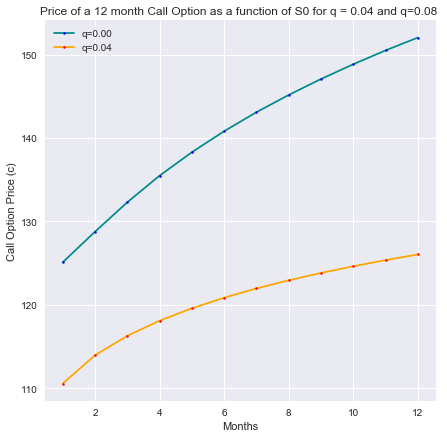

In [95]:
sns.set()
plt.figure(figsize=(7,7))
plt.plot(range(1,13),CritPrice1, marker='o',c='darkcyan',ms=2.5, mfc='b',label="q=0.00")
plt.plot(range(1,13),CritPrice2, marker='o',c='orange',ms=2.5, mfc='r',label="q=0.04")
plt.legend(loc="best")
plt.ylabel("Call Option Price (c)")
plt.xlabel("Months")
plt.title("Price of a 12 month Call Option as a function of S0 for q = 0.04 and q=0.08 ")
plt.show()